# Task 1 CodSoft Titanic Dataset

# Project: Titanic Dataset - [tested.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about Titanic and some of passenger informations and whether they have survived or not.


### Question(s) for Analysis
>Do we have useless columns that needs to be removed?.

>Do we have duplicated data? missing or null values?.

>How many people survived in each embarked?.

>Which pclass has the highest fare?.

>Does surviving is affected by pclass?.

>Does surviving is affected by age?.

>Which age has the highest opportunity to survive in those situations?.

>Does surviving is affected by gender?.


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as srs
from matplotlib import colors

<a id='wrangling'></a>
## Data Wrangling

> In this section, and after setting the questions, the unused columns will be dropped , so it can be more consistent and clear, also it will be free of duplicated and missing values.

In [2]:
#loading the data
df =pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#checking if there is a duplicated data
df.duplicated().sum()

0

We have no duplicated values.

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.columns = df.columns.str.lower()
df.head(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
#checking if there is a null values.
df['age'].isnull().sum()

86

In [8]:
# Drop rows with null values in the 'age' column
df.dropna(subset=['age'], inplace=True)

In [9]:
#checking if there is a null values.
df['age'].isnull().sum().any()

False

<a id='eda'></a>
## Data Exploratory
> In this section, and after wrangling the data, the data will be explored to be more understandable to analyze.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  332 non-null    int64  
 1   survived     332 non-null    int64  
 2   pclass       332 non-null    int64  
 3   name         332 non-null    object 
 4   sex          332 non-null    object 
 5   age          332 non-null    float64
 6   sibsp        332 non-null    int64  
 7   parch        332 non-null    int64  
 8   ticket       332 non-null    object 
 9   fare         331 non-null    float64
 10  cabin        87 non-null     object 
 11  embarked     332 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 33.7+ KB


In [11]:
df.nunique()

passengerid    332
survived         2
pclass           3
name           332
sex              2
age             79
sibsp            7
parch            7
ticket         285
fare           148
cabin           72
embarked         3
dtype: int64

In [12]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,331.000000
mean,1100.063253,0.382530,2.144578,30.272590,0.481928,0.397590,40.982087
std,122.763173,0.486739,0.846283,14.181209,0.874084,0.810651,61.228558
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1099.500000,0.000000,2.000000,27.000000,0.000000,0.000000,16.000000
75%,1210.250000,1.000000,3.000000,39.000000,1.000000,1.000000,40.633350
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200


In [13]:
df['survived'].value_counts()

0    205
1    127
Name: survived, dtype: int64

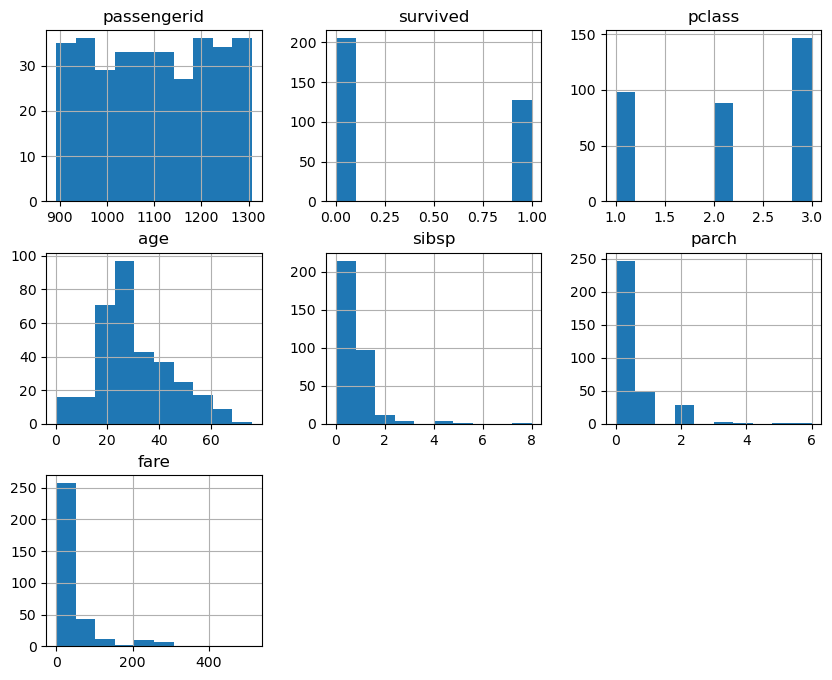

In [14]:
df.hist(figsize=(10,8));

In [15]:
df['embarked'].value_counts()

S    228
C     82
Q     22
Name: embarked, dtype: int64

# How many people survived in each embarked

In [16]:
survived_by_embarked = df[df['survived'] == 1].groupby('embarked')['survived'].value_counts()
print(survived_by_embarked)

embarked  survived
C         1           37
Q         1           12
S         1           78
Name: survived, dtype: int64


Looks like that the most survived people embarked in Southampton!

# Which pclass has the highest fare?

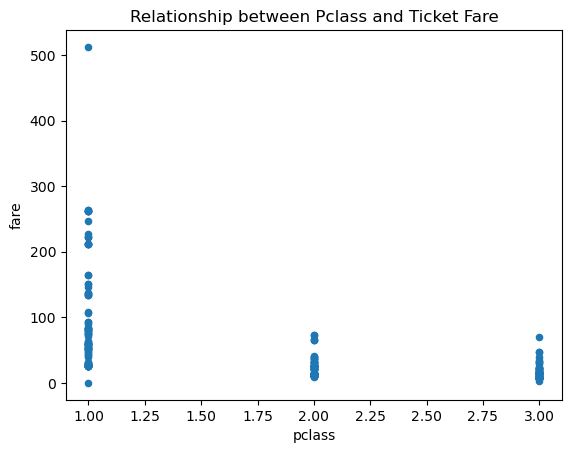

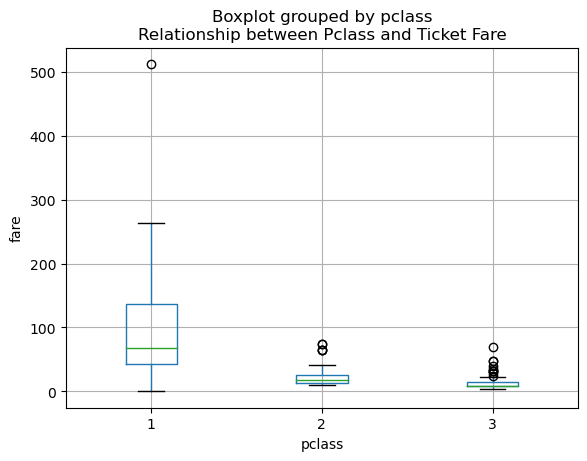

In [17]:
df.plot.scatter(x='pclass', y='fare')
plt.title('Relationship between Pclass and Ticket Fare')
plt.xlabel('pclass')
plt.ylabel('fare')
plt.show()

df.boxplot(column='fare', by='pclass')
plt.title('Relationship between Pclass and Ticket Fare')
plt.xlabel('pclass')
plt.ylabel('fare')
plt.show()

The 1 in pclass refers to the highest amount of fare!

# Does surviving is affected by pclass?

In [18]:
df['pclass'].value_counts()

3    146
1     98
2     88
Name: pclass, dtype: int64

In [19]:
survived_by_pclass = df.groupby('pclass')['survived'].sum()
print(survived_by_pclass)

pclass
1    48
2    29
3    50
Name: survived, dtype: int64


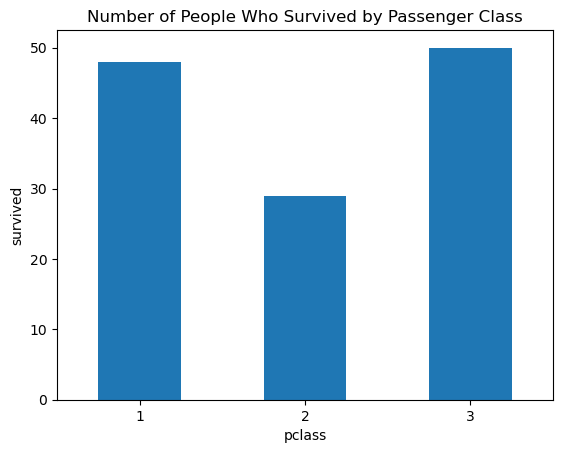

In [20]:
survived_by_pclass.plot(kind='bar')
plt.title('Number of People Who Survived by Passenger Class')
plt.xlabel('pclass')
plt.ylabel('survived')
plt.xticks(rotation=360)
plt.show()

Until now, it seems that the class 3 has the most survived passengers as a total number of survived, 
>but what if we compared it to the total number of not survived in the whole?

In [21]:
survived_by_pclass = df[df['survived'] == 1].groupby('pclass')['survived'].count()
not_survived_by_pclass = df[df['survived'] == 0].groupby('pclass')['survived'].count()
not_survived_by_pclass

pclass
1    50
2    59
3    96
Name: survived, dtype: int64

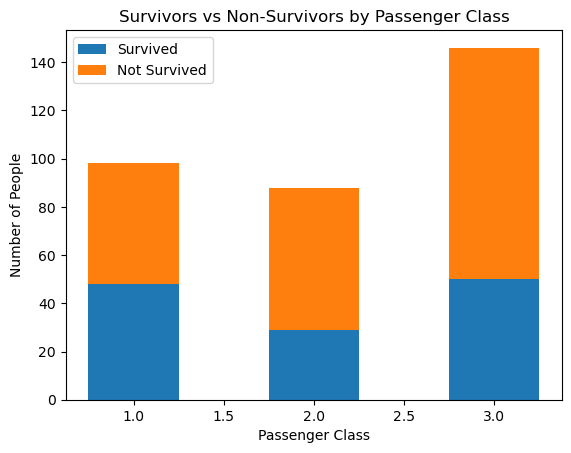

In [22]:
width = 0.50  # width of the bars
x = survived_by_pclass.index  # x-axis values

fig, ax = plt.subplots()
survived_bars = ax.bar(x, survived_by_pclass, width, label='Survived')
not_survived_bars = ax.bar(x, not_survived_by_pclass, width, label='Not Survived', bottom=survived_by_pclass)

ax.set_title('Survivors vs Non-Survivors by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of People')
ax.legend()

plt.show()

As we see, the maximum number of survived passengers was in class 3 , but compared to the number of not survived passengers it appears that the class 1 has the most survived passengers compared to the total of not survived passengers in each class!

So, in those situations, being in a better class may increase the possibility of survival

In [23]:
df.tail(20)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
393,1285,0,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S
394,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
395,1287,1,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
396,1288,0,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,NaN,Q
397,1289,1,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C
398,1290,0,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
399,1291,0,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
400,1292,1,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
401,1293,0,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
402,1294,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C


# Does survival is affected by age?

In [24]:
#let's see how many passengers survived in each age group
survivors = df[df['survived'] == 1]

# Calculate the count of survivors in each age group
survivors_by_age = survivors.groupby(pd.cut(survivors['age'], bins=range(0, 80, 10)))['survived'].count()
survivors_by_age

age
(0, 10]     10
(10, 20]    22
(20, 30]    45
(30, 40]    20
(40, 50]    15
(50, 60]    11
(60, 70]     3
Name: survived, dtype: int64

age between 20 and 30 has the most survived passenger

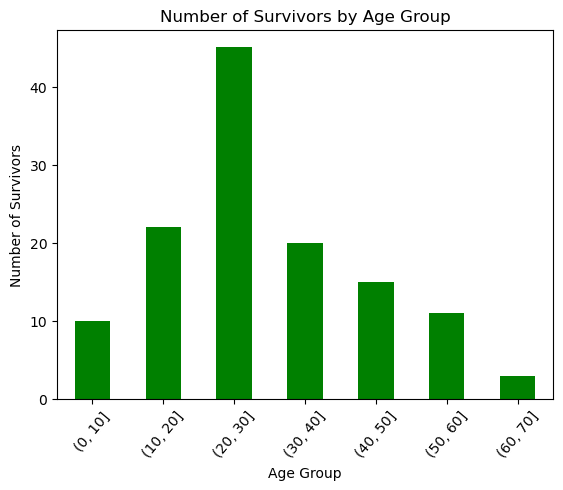

In [33]:
#making it more clear by visualizing the survived passengers by age group
survivors_by_age.plot(kind='bar', color=colors)
colors = ['green']
plt.title('Number of Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=50)
plt.show()

In [29]:
#let's see how many passengers not survived in each age group
not_survivors = df[df['survived'] == 0]

# Calculate the count of survivors in each age group
not_survivors_by_age = not_survivors.groupby(pd.cut(not_survivors['age'], bins=range(0, 80, 10)))['survived'].count()
not_survivors_by_age

age
(0, 10]     12
(10, 20]    25
(20, 30]    86
(30, 40]    35
(40, 50]    31
(50, 60]     9
(60, 70]     7
Name: survived, dtype: int64

In [ ]:
age between 20 and 30 has the most not survived passengers also!

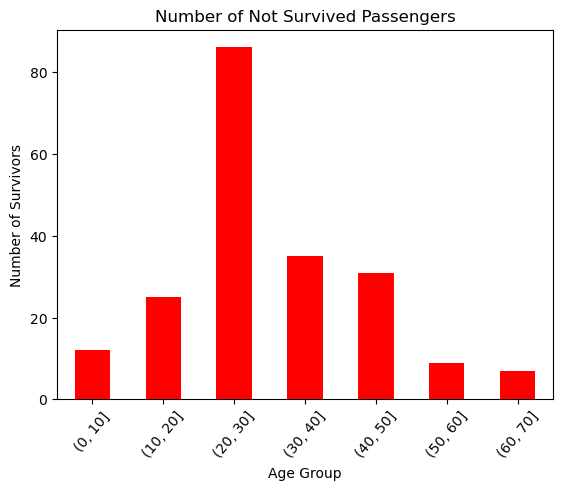

In [31]:
#making it more clear by visualizing the not survived passengers by age group
not_survivors_by_age.plot(kind='bar',color=colors)
colors = ['red']
plt.title('Number of Not Survived Passengers')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=50)
plt.show()

# Comparing between surviving and not surviving in each age group

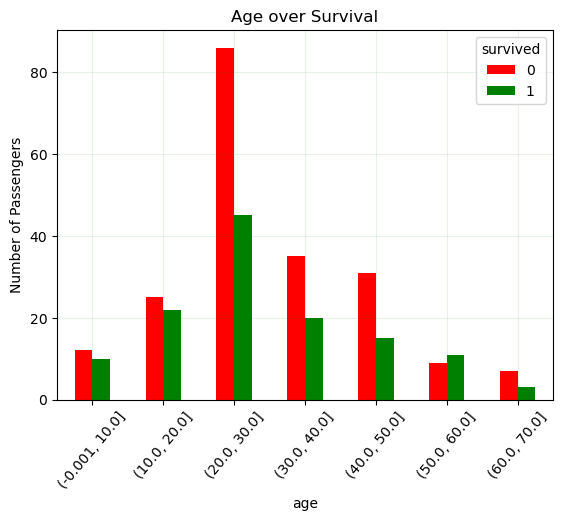

In [27]:
age_range = pd.cut(df['age'], bins=range(0, 80, 10), include_lowest=True)
cross_tab = pd.crosstab(age_range, df['survived'])

# Define custom colors for the bars
colors = ['red', 'green']  # Red for 'Not Survived' (0), Green for 'Survived' (1)

# Plotting the data
ax = cross_tab.plot(kind='bar', color=colors)
plt.ylabel('Number of Passengers')
plt.title('Age over Survival')
plt.xticks(rotation=50)

# Changing the color of the grid lines
ax.grid(color='green', linestyle="-", alpha=0.1)

plt.show()

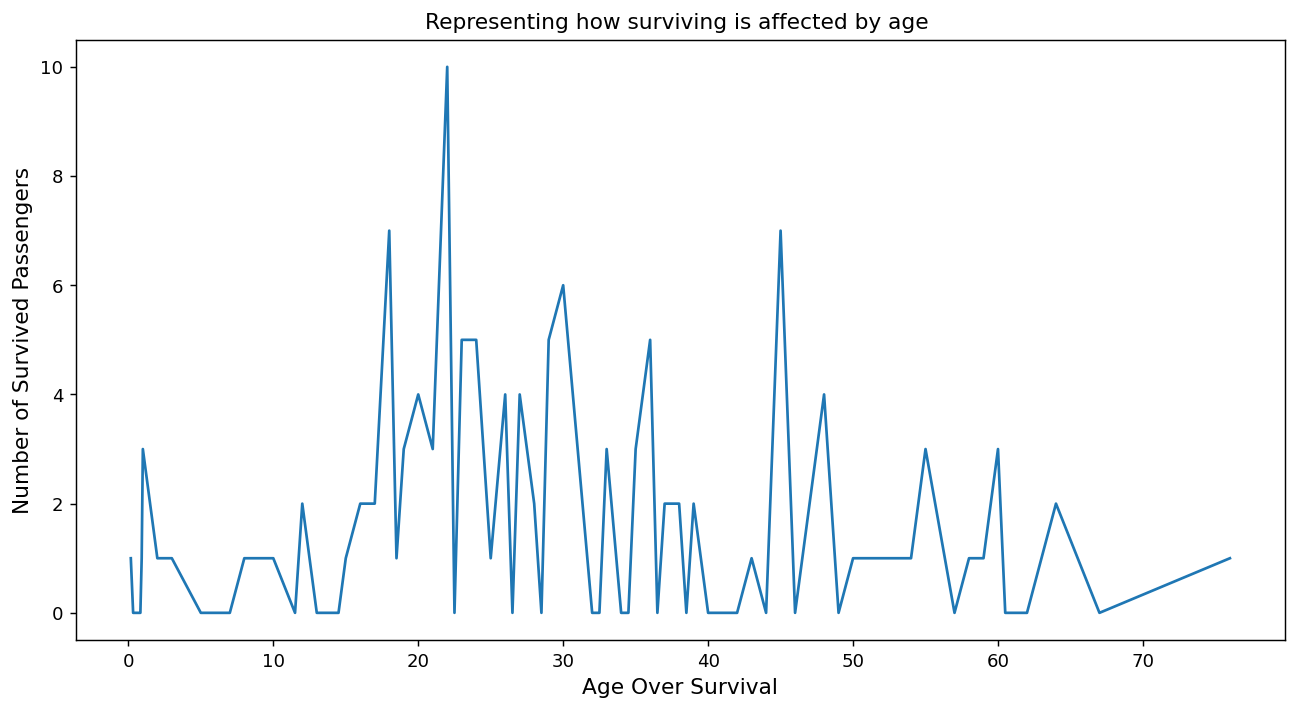

In [34]:
#age over surviving in cleared point of view
age_survive = df.groupby('age')['survived'].sum()
#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Age Over Survival', fontsize = 12)
#on y-axis
plt.ylabel('Number of Survived Passengers', fontsize = 12)
#title of the line plot
plt.title('Representing how surviving is affected by age ')

#plotting the graph
plt.plot(age_survive)

#displaying the line plot
plt.show()


# Does survival is affected by gender?

In [35]:
df['sex'].isnull().sum()

0

In [36]:
df['sex'].value_counts()

male      205
female    127
Name: sex, dtype: int64

In [37]:
#checking which has the highest number of survived passengers males or females
survived_by_gender = df.groupby('sex')['survived'].sum()
print(survived_by_gender)

sex
female    127
male        0
Name: survived, dtype: int64


All the survived passengers was females?

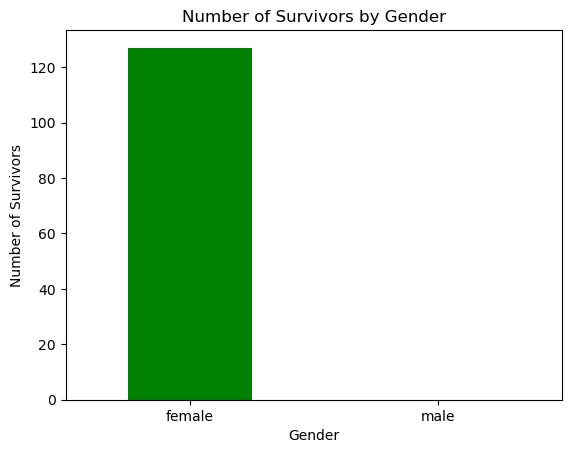

In [41]:
#visulaizing to make it more clear
survived_by_gender.plot(kind='bar', color=colors)
colors = ['green']
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=360)
plt.show()

<a id='conclusions'></a>
## Conclusions

> Finally, after investigating the dataset, and exploring it successflly using visuals to answer the research question, It seems to be clear that most of passengers embarked in southampton, and that the highest fare in pclass is class 1, and it has a positive relationship with survival, age and gender may have a relationship with survival as being in age between 20 and 30 may be a possibility to survive more, but also to not survive! and finally females has the best chance to survive in those situations

>Limitations: This analysis was done considering Titanic and survival possibilites . This might not be completely error free but by following these suggestion one can increase the probability of survival in another situations. Moreover we are not sure if the data provided to us is completely correct and up-to-date. As mentioned before that this is tested data not the whole data, it might be possible that a large number of male was survived. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis